In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df_credit = pd.read_csv("./train.csv")

df_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df_credit.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

verifier si on a des valeurs manquantes

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeurs manquantes :
- Pour les variables catégoriquesn on va les remplacer par le mode
- Pour les variables nuémriques , on va les remplacer par la moyenne ou la mediane

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
var_cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

print('Les variables categoriques sont :', var_cat)
print('Les variables numeriques sont :', var_num)

Les variables categoriques sont : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numeriques sont : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [10]:
# Supprimer les valeurs manquantes coté variables categoriques
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) 
df['Married'].fillna(df['Married'].mode()[0],inplace=True)  
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)  
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) 

In [11]:
# Supprimer les valeurs manquantes coté variables numeriques
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True) 
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Analyse univariée

In [13]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Credit accordé ou pas'}, xlabel='Loan_Status'>

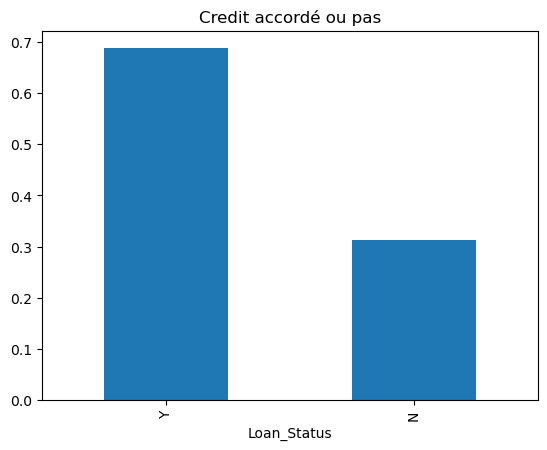

In [14]:
df["Loan_Status"].value_counts(normalize=True).plot.bar(title="Credit accordé ou pas")

les Variables catégoriques

In [15]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

<Axes: title={'center': 'Comparaisons des seces'}, xlabel='Gender'>

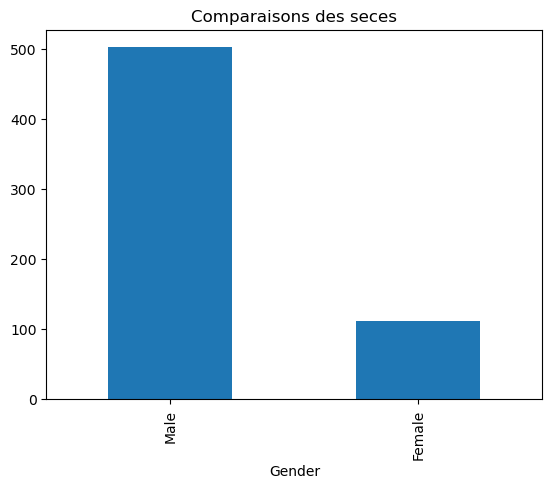

In [16]:
df['Gender'].value_counts().plot.bar(title="Comparaisons des seces")

Married, Self_employed, Credit_history

In [17]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

<Axes: title={'center': 'Nombres de gens marriés'}, xlabel='Married'>

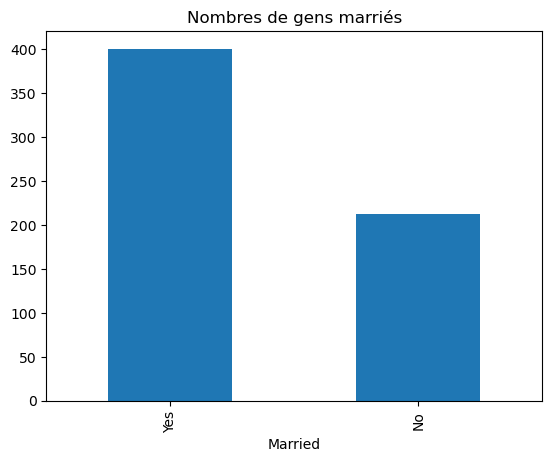

In [18]:
df['Married'].value_counts().plot.bar(title="Nombres de gens marriés")

Depends

In [19]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: title={'center': 'Le nombre d enfants'}, xlabel='Dependents'>

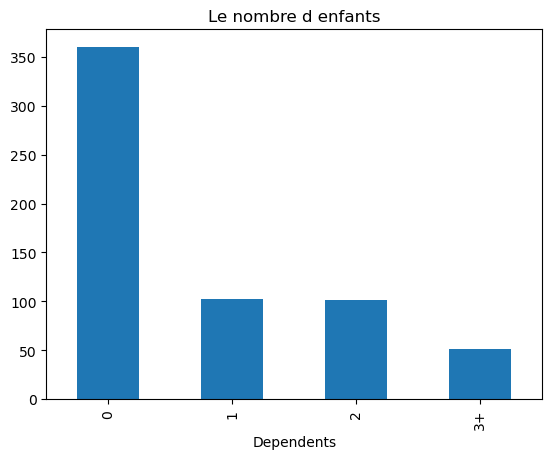

In [20]:
df['Dependents'].value_counts().plot.bar(title="Le nombre d enfants")

### Les variables numériques

In [21]:
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_7316\3063781865.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


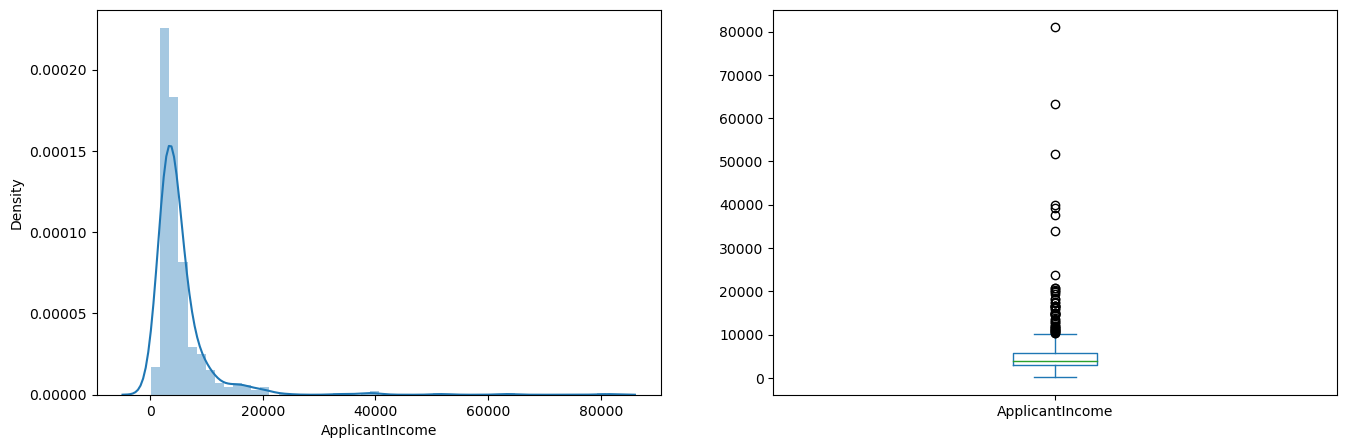

In [22]:
# applicantincome

plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()

## Analyse bivariée

In [23]:
var_cat2 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


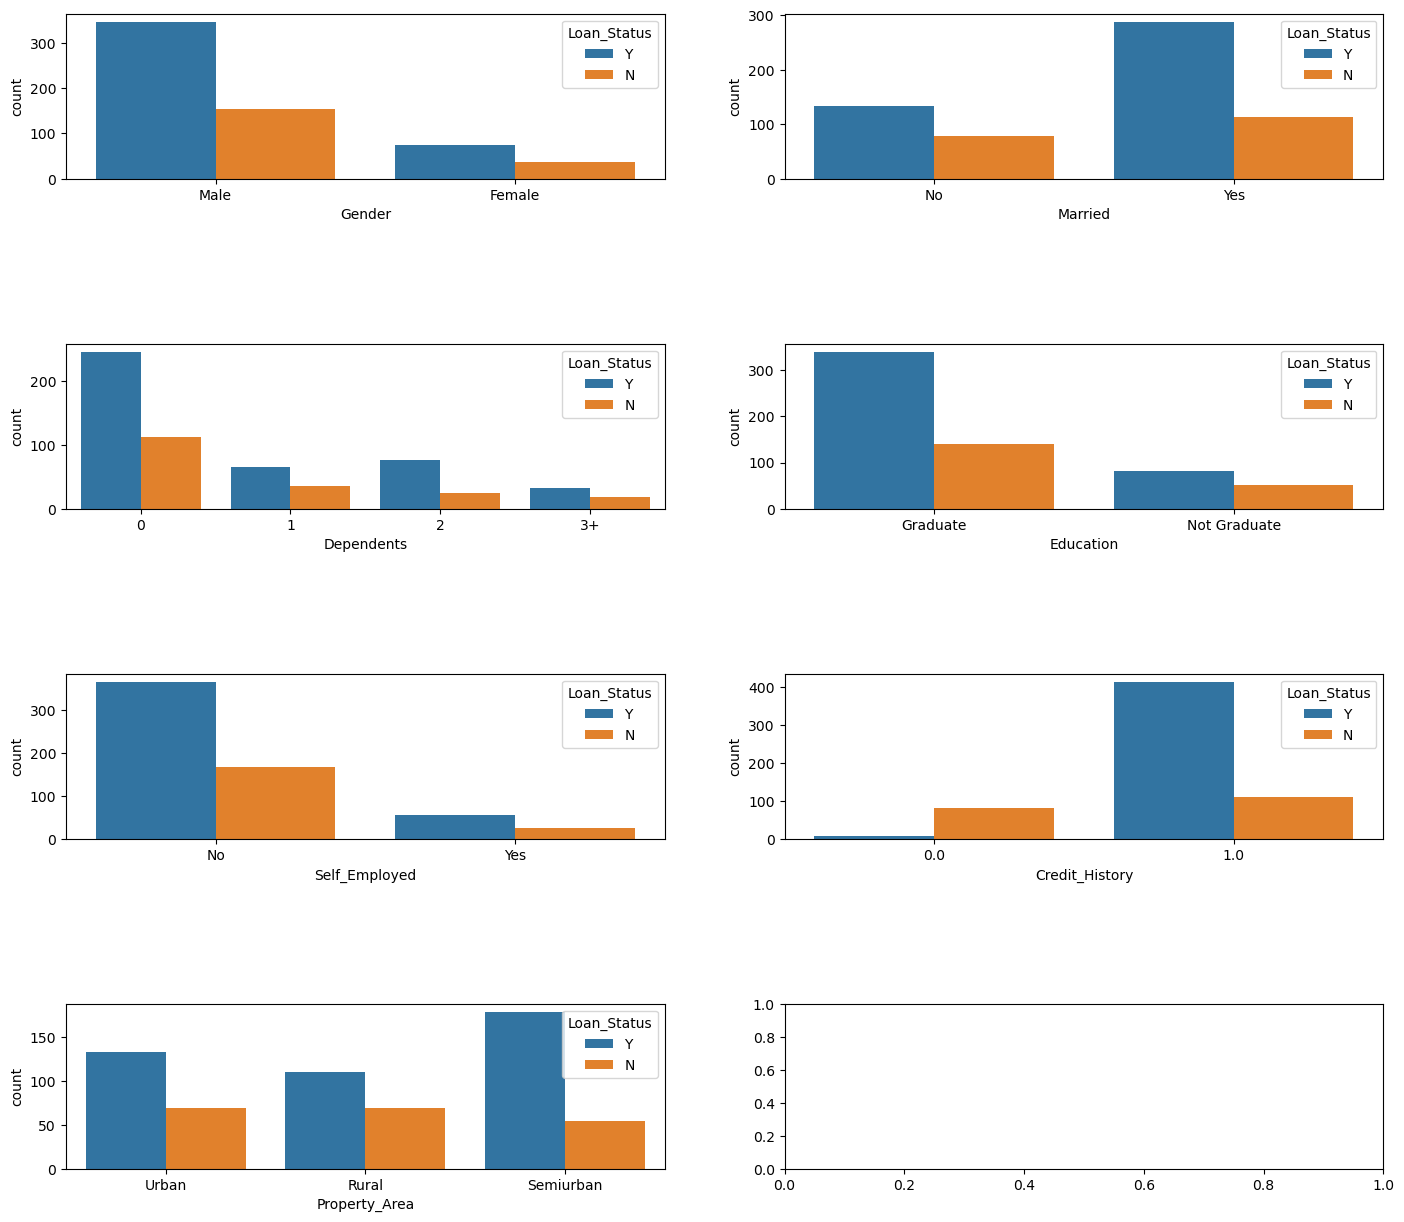

In [24]:
# les variables catégoriques
fig,axes= plt.subplots(4,2,figsize=(17,15))
for idx, cat_col in enumerate(var_cat2):
    row,col =idx//2,idx%2
    sns.countplot(x=cat_col,data=df, hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

Matrice de correlation des variables numeriques

In [28]:
matrice=df.corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrice,vmax=.8,square=True,cmap='BuPu',annot=True)

ValueError: could not convert string to float: 'LP001002'